# SIMPLE RETURNS AND LOG RETURNS

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# APPLE RETURNS  

In [340]:
start="2000-01-01"
end="2024-08-12"
apple=yf.download("AAPL",start=start,end=end,interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [341]:
apple=apple[["Close"]]

In [342]:
apple

,Close
Date,
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393
...,...
2024-08-05,209.270004
2024-08-06,207.229996
2024-08-07,209.820007


#  indexing the dataset for proper data in each day

In [343]:
start="2000-01-01"
end="2024-08-12"

all_days=pd.date_range(start=start,end=end,freq="D")

all_days

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-08-03', '2024-08-04', '2024-08-05', '2024-08-06',
               '2024-08-07', '2024-08-08', '2024-08-09', '2024-08-10',
               '2024-08-11', '2024-08-12'],
              dtype='datetime64[ns]', length=8991, freq='D')

In [344]:
apple

,Close
Date,
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393
...,...
2024-08-05,209.270004
2024-08-06,207.229996
2024-08-07,209.820007


In [345]:
apple=apple.reindex(all_days)
apple

,Close
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
...,...
2024-08-08,213.309998
2024-08-09,216.240005
2024-08-10,NaN
2024-08-11,NaN


In [346]:
apple=apple.fillna(method="ffill")

In [347]:
apple

,Close
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
...,...
2024-08-08,213.309998
2024-08-09,216.240005
2024-08-10,216.240005
2024-08-11,216.240005


In [348]:
apple["day"]=apple.index.day_name()
# apple=apple.to_frame()

In [349]:
apple

,Close,day
2000-01-01,NaN,Saturday
2000-01-02,NaN,Sunday
2000-01-03,0.999442,Monday
2000-01-04,0.915179,Tuesday
2000-01-05,0.928571,Wednesday
...,...,...
2024-08-08,213.309998,Thursday
2024-08-09,216.240005,Friday
2024-08-10,216.240005,Saturday
2024-08-11,216.240005,Sunday


In [350]:
apple=apple["Close"].to_frame()

In [351]:
apple


,Close
2000-01-01,NaN
2000-01-02,NaN
2000-01-03,0.999442
2000-01-04,0.915179
2000-01-05,0.928571
...,...
2024-08-08,213.309998
2024-08-09,216.240005
2024-08-10,216.240005
2024-08-11,216.240005


# daily returns and commulative returns

In [352]:
apple["d_returns"]=np.log(apple.div(apple.shift(1)))


In [353]:
apple

,Close,d_returns
2000-01-01,NaN,NaN
2000-01-02,NaN,NaN
2000-01-03,0.999442,NaN
2000-01-04,0.915179,-0.088077
2000-01-05,0.928571,0.014527
...,...,...
2024-08-08,213.309998,0.016496
2024-08-09,216.240005,0.013642
2024-08-10,216.240005,0.000000
2024-08-11,216.240005,0.000000


In [354]:
apple.dropna(inplace=True)

In [355]:
apple

,Close,d_returns
2000-01-04,0.915179,-0.088077
2000-01-05,0.928571,0.014527
2000-01-06,0.848214,-0.090514
2000-01-07,0.888393,0.046281
2000-01-08,0.888393,0.000000
...,...,...
2024-08-08,213.309998,0.016496
2024-08-09,216.240005,0.013642
2024-08-10,216.240005,0.000000
2024-08-11,216.240005,0.000000


In [356]:
sum=apple.d_returns.sum()

In [357]:
np.exp(apple.d_returns.sum())

216.3607388279991

In [358]:
apple["c_returns"]=np.exp(apple.d_returns.cumsum())

In [359]:
apple

,Close,d_returns,c_returns
2000-01-04,0.915179,-0.088077,0.915690
2000-01-05,0.928571,0.014527,0.929089
2000-01-06,0.848214,-0.090514,0.848688
2000-01-07,0.888393,0.046281,0.888889
2000-01-08,0.888393,0.000000,0.888889
...,...,...,...
2024-08-08,213.309998,0.016496,213.429095
2024-08-09,216.240005,0.013642,216.360739
2024-08-10,216.240005,0.000000,216.360739
2024-08-11,216.240005,0.000000,216.360739


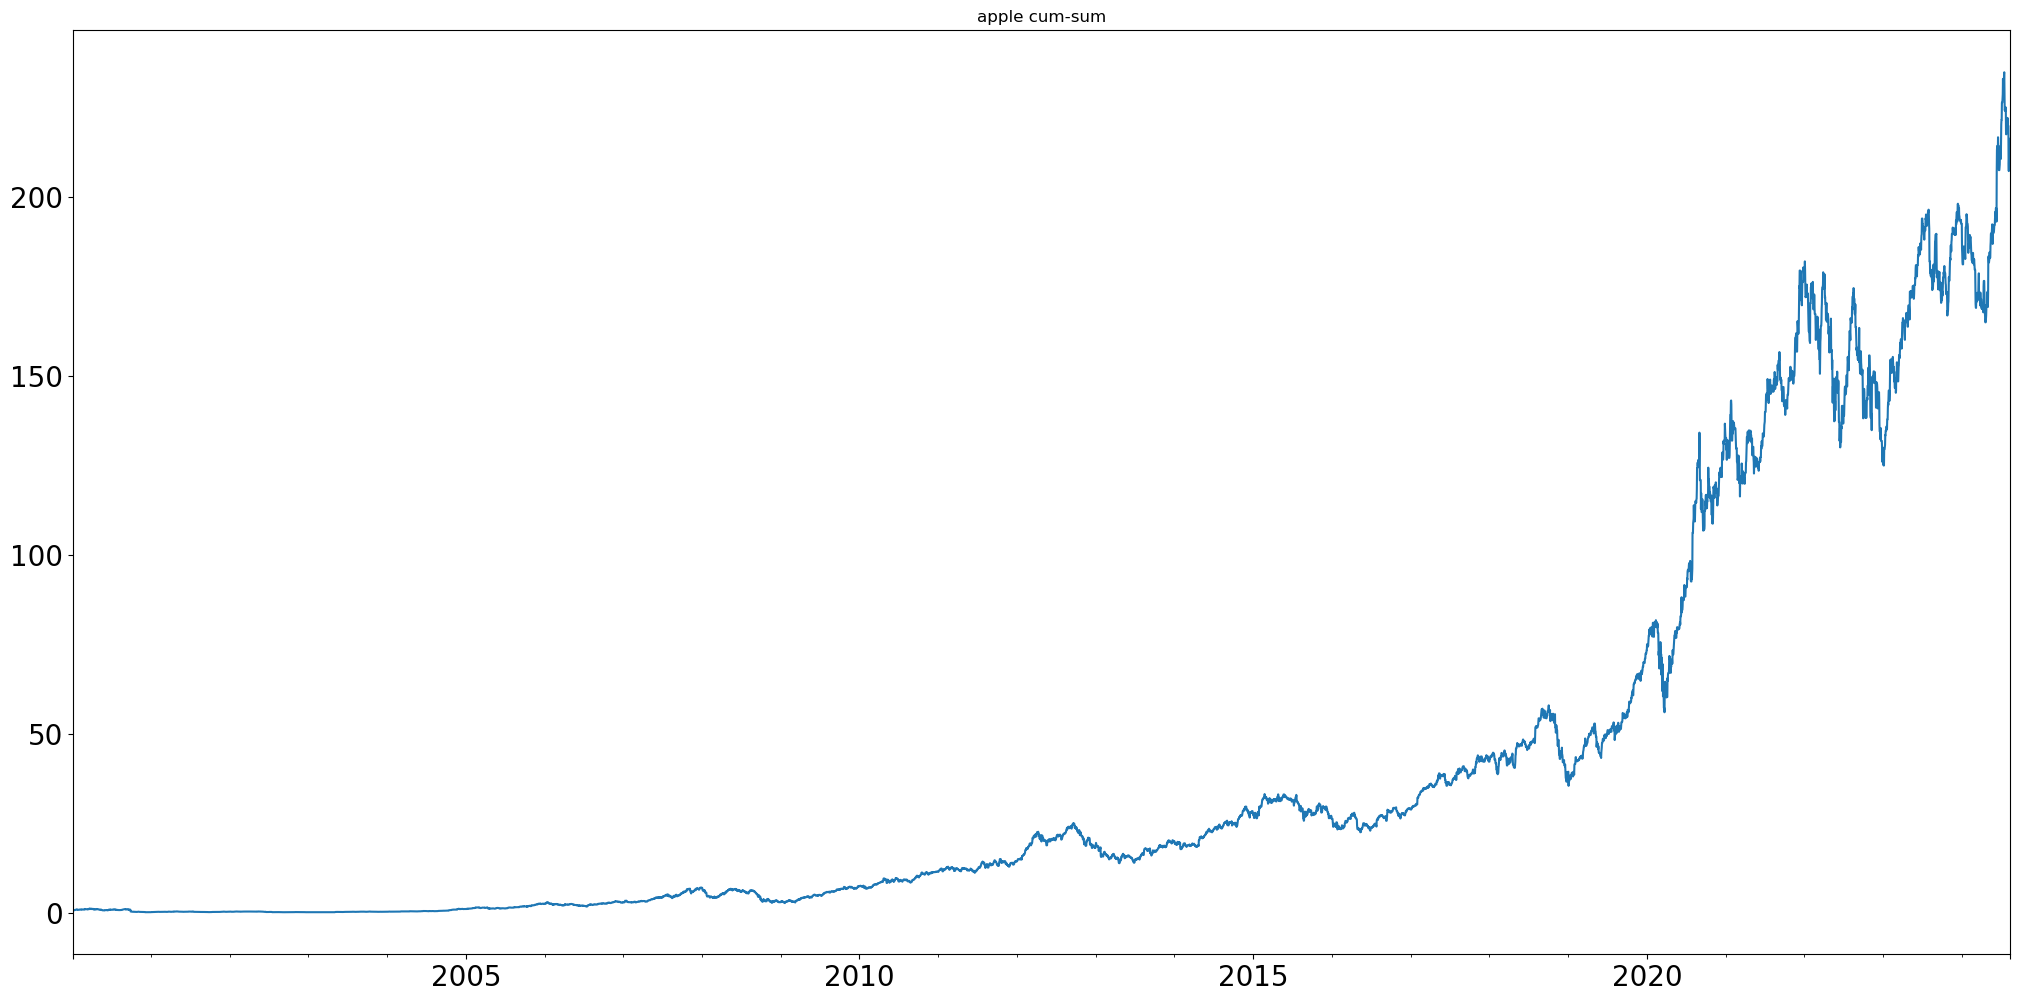

In [360]:
apple.c_returns.plot(figsize=(25,12),title="apple cum-sum",fontsize=20)
plt.show()

In [361]:
apple.d_returns.mean()*252

0.15075552621886104

In [362]:
apple.d_returns.std()*np.sqrt(252)

0.33483753212750683

# drawdown

In [363]:
# which part should the graph goes up to down 
# find the cummulative maximum 


In [364]:
apple["cum_max"]=apple.c_returns.cummax()

In [365]:
apple

,Close,d_returns,c_returns,cum_max
2000-01-04,0.915179,-0.088077,0.915690,0.915690
2000-01-05,0.928571,0.014527,0.929089,0.929089
2000-01-06,0.848214,-0.090514,0.848688,0.929089
2000-01-07,0.888393,0.046281,0.888889,0.929089
2000-01-08,0.888393,0.000000,0.888889,0.929089
...,...,...,...,...
2024-08-08,213.309998,0.016496,213.429095,234.951114
2024-08-09,216.240005,0.013642,216.360739,234.951114
2024-08-10,216.240005,0.000000,216.360739,234.951114
2024-08-11,216.240005,0.000000,216.360739,234.951114


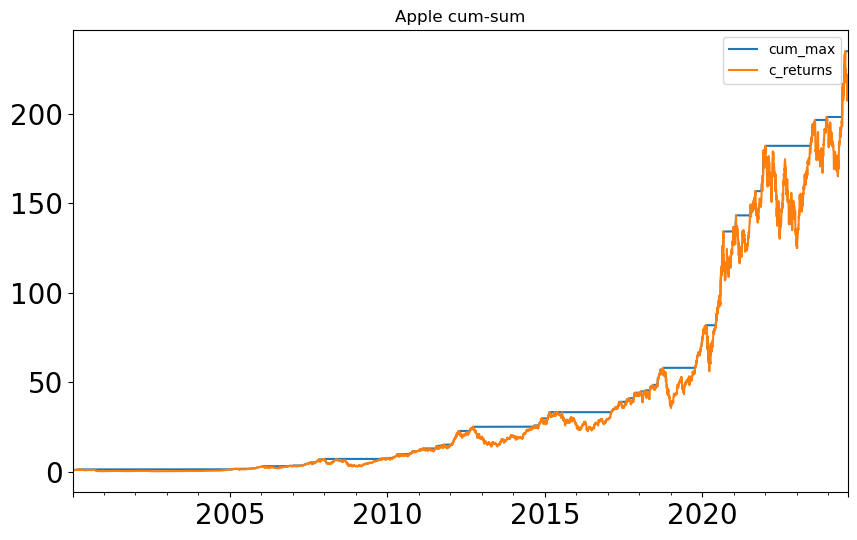

In [366]:
apple[["cum_max","c_returns"]].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 )
plt.show()

# apple.c_returns.plot(figsize=(25,12),title="apple cum-sum",fontsize=20)
# plt.show()

In [367]:
apple["drawdown"]=apple["cum_max"]-apple["c_returns"]

In [368]:
apple

,Close,d_returns,c_returns,cum_max,drawdown
2000-01-04,0.915179,-0.088077,0.915690,0.915690,0.000000
2000-01-05,0.928571,0.014527,0.929089,0.929089,0.000000
2000-01-06,0.848214,-0.090514,0.848688,0.929089,0.080402
2000-01-07,0.888393,0.046281,0.888889,0.929089,0.040200
2000-01-08,0.888393,0.000000,0.888889,0.929089,0.040200
...,...,...,...,...,...
2024-08-08,213.309998,0.016496,213.429095,234.951114,21.522019
2024-08-09,216.240005,0.013642,216.360739,234.951114,18.590376
2024-08-10,216.240005,0.000000,216.360739,234.951114,18.590376
2024-08-11,216.240005,0.000000,216.360739,234.951114,18.590376


In [369]:
apple.drawdown.max()

57.02181710313177

# max drawdown - 57.02

apple.drawdown.Idxmax()

In [370]:
apple.drawdown.idxmax()

Timestamp('2023-01-05 00:00:00', freq='D')

# date- >  2023- 01-05 is the date , where apple shocks goes maximum drawdown

In [371]:
apple.loc[(apple.index=="2023-01-05")]

,Close,d_returns,c_returns,cum_max,drawdown
2023-01-05,125.019997,-0.010661,125.089799,182.111616,57.021817


In [372]:
apple.loc[(apple.index<="2023-01-05")]

,Close,d_returns,c_returns,cum_max,drawdown
2000-01-04,0.915179,-0.088077,0.915690,0.915690,0.000000
2000-01-05,0.928571,0.014527,0.929089,0.929089,0.000000
2000-01-06,0.848214,-0.090514,0.848688,0.929089,0.080402
2000-01-07,0.888393,0.046281,0.888889,0.929089,0.040200
2000-01-08,0.888393,0.000000,0.888889,0.929089,0.040200
...,...,...,...,...,...
2023-01-01,129.929993,0.000000,130.002537,182.111616,52.109080
2023-01-02,129.929993,0.000000,130.002537,182.111616,52.109080
2023-01-03,125.070000,-0.038122,125.139830,182.111616,56.971786
2023-01-04,126.360001,0.010261,126.430551,182.111616,55.681065


percentage drawdown

In [373]:
apple["% draw down"]=(apple["cum_max"]-apple["c_returns" ] )/(apple["cum_max"])

In [374]:
apple

,Close,d_returns,c_returns,cum_max,drawdown,% draw down
2000-01-04,0.915179,-0.088077,0.915690,0.915690,0.000000,0.000000
2000-01-05,0.928571,0.014527,0.929089,0.929089,0.000000,0.000000
2000-01-06,0.848214,-0.090514,0.848688,0.929089,0.080402,0.086538
2000-01-07,0.888393,0.046281,0.888889,0.929089,0.040200,0.043269
2000-01-08,0.888393,0.000000,0.888889,0.929089,0.040200,0.043269
...,...,...,...,...,...,...
2024-08-08,213.309998,0.016496,213.429095,234.951114,21.522019,0.091602
2024-08-09,216.240005,0.013642,216.360739,234.951114,18.590376,0.079124
2024-08-10,216.240005,0.000000,216.360739,234.951114,18.590376,0.079124
2024-08-11,216.240005,0.000000,216.360739,234.951114,18.590376,0.079124


In [375]:
apple["% draw down"].max()

0.8180144592385886

In [376]:
apple["% draw down"].idxmax()

Timestamp('2003-04-17 00:00:00', freq='D')

In [377]:
apple.loc[(apple.index<="2003-04-17")]

,Close,d_returns,c_returns,cum_max,drawdown,% draw down
2000-01-04,0.915179,-0.088077,0.915690,0.915690,0.000000,0.000000
2000-01-05,0.928571,0.014527,0.929089,0.929089,0.000000,0.000000
2000-01-06,0.848214,-0.090514,0.848688,0.929089,0.080402,0.086538
2000-01-07,0.888393,0.046281,0.888889,0.929089,0.040200,0.043269
2000-01-08,0.888393,0.000000,0.888889,0.929089,0.040200,0.043269
...,...,...,...,...,...,...
2003-04-13,0.235714,0.000000,0.235846,1.288107,1.052261,0.816905
2003-04-14,0.242500,0.028383,0.242635,1.288107,1.045471,0.811634
2003-04-15,0.239107,-0.014091,0.239240,1.288107,1.048866,0.814270
2003-04-16,0.236429,-0.011263,0.236561,1.288107,1.051546,0.816350


# strategy (SMA )

In [378]:
data=apple.loc[(apple.index>="2000-01-01")]

In [379]:
data=data["Close"].to_frame()

In [380]:
data

,Close
2000-01-04,0.915179
2000-01-05,0.928571
2000-01-06,0.848214
2000-01-07,0.888393
2000-01-08,0.888393
...,...
2024-08-08,213.309998
2024-08-09,216.240005
2024-08-10,216.240005
2024-08-11,216.240005


In [381]:
sma_s=40
sma_l=100



In [382]:
data["sma_s"]=data.Close.rolling(sma_s).mean()
data["sma_l"]=data.Close.rolling(sma_l).mean()

In [383]:
data

,Close,sma_s,sma_l
2000-01-04,0.915179,NaN,NaN
2000-01-05,0.928571,NaN,NaN
2000-01-06,0.848214,NaN,NaN
2000-01-07,0.888393,NaN,NaN
2000-01-08,0.888393,NaN,NaN
...,...,...,...
2024-08-08,213.309998,222.230250,206.3219
2024-08-09,216.240005,222.370750,206.7913
2024-08-10,216.240005,222.358001,207.2234
2024-08-11,216.240005,222.257251,207.5520


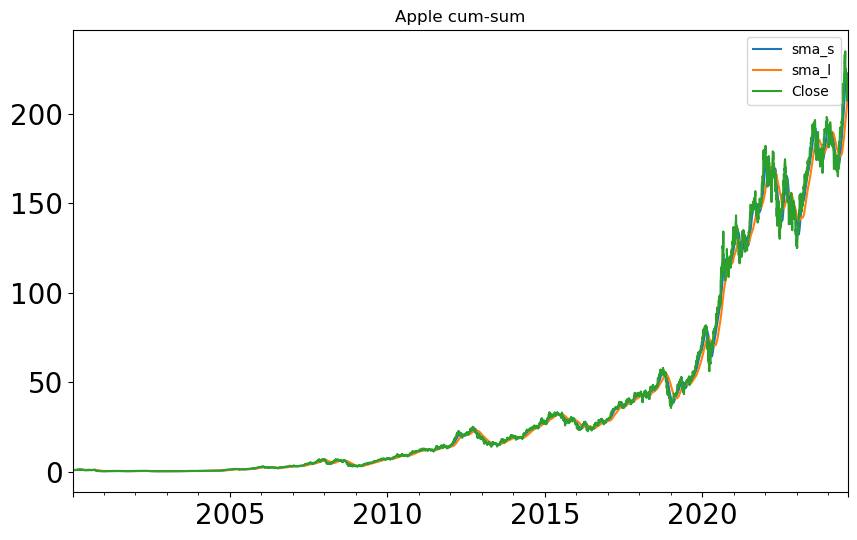

In [384]:
data[["sma_s","sma_l","Close"]].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 )
plt.show()



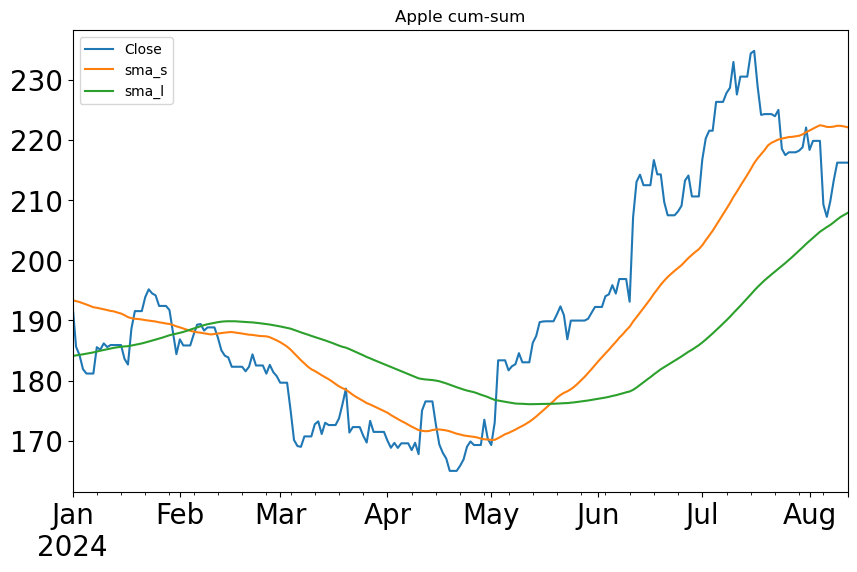

In [385]:
data.loc["2024"].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 )
plt.show()



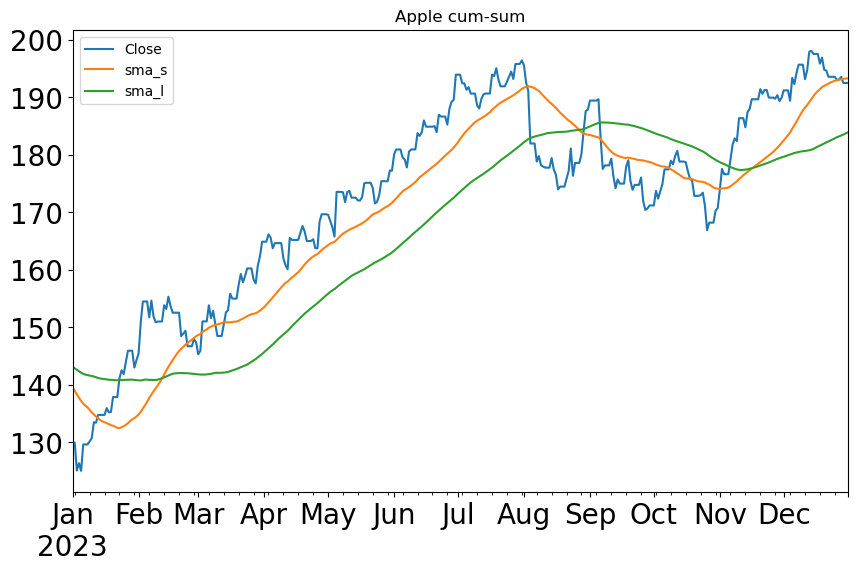

In [386]:
data.loc["2023"].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 )
plt.show()



In [387]:
data.dropna(inplace=True)

# precision , when sma_s > sma_l

In [388]:
data["precision"]=np.where(data["sma_s"]>data["sma_l"],1,-1)

In [389]:
data.head(50)

,Close,sma_s,sma_l,precision
2000-04-12,0.975446,1.148856,1.038338,1
2000-04-13,1.016183,1.145689,1.039348,1
2000-04-14,0.998884,1.142090,1.040052,1
2000-04-15,0.998884,1.139007,1.041558,1
2000-04-16,0.998884,1.136551,1.042663,1
2000-04-17,1.106027,1.136970,1.044840,1
2000-04-18,1.132813,1.138002,1.047284,1
2000-04-19,1.081473,1.136970,1.049371,1
2000-04-20,1.061384,1.135435,1.051703,1
2000-04-21,1.061384,1.133901,1.054533,1


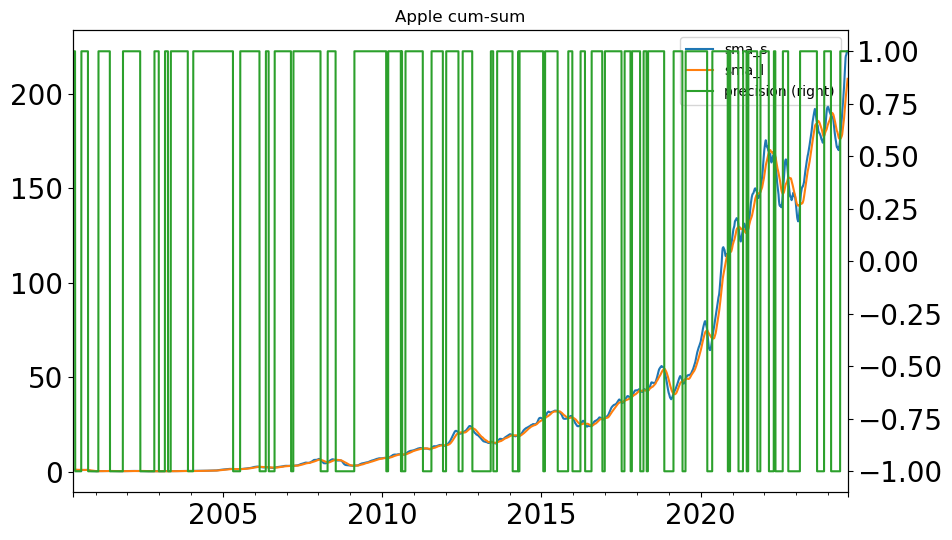

In [390]:
data.loc[:,["sma_s","sma_l","precision"]].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 ,secondary_y="precision")
plt.show()



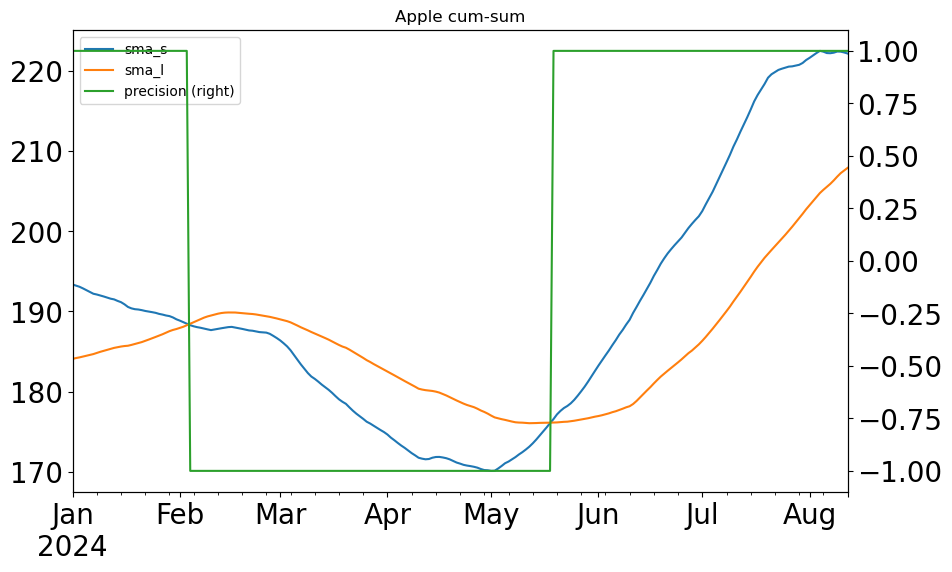

In [391]:
data.loc["2024",["sma_s","sma_l","precision"]].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 ,secondary_y="precision")
plt.show()



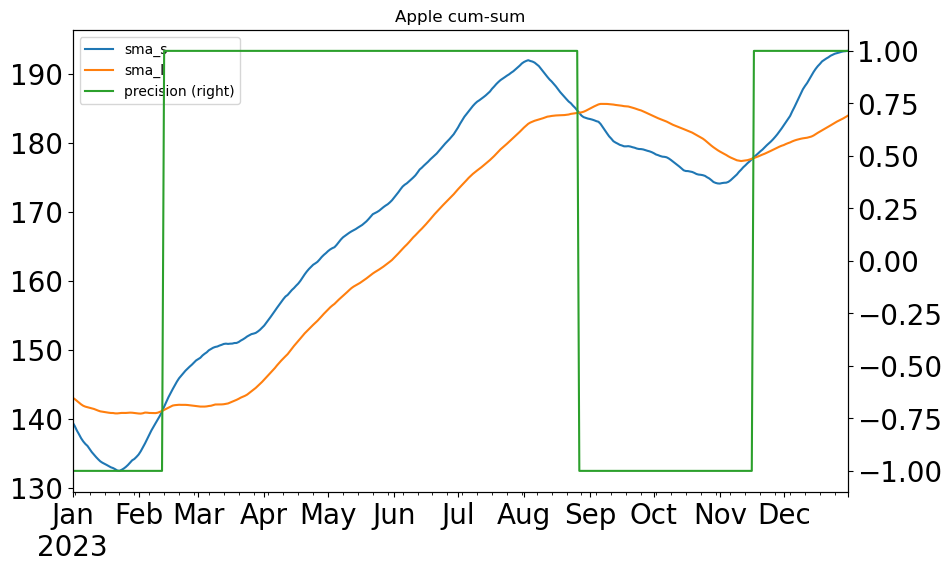

In [392]:
data.loc["2023",["sma_s","sma_l","precision"]].plot(figsize=(10,6),title="Apple cum-sum",fontsize=20 ,secondary_y="precision")
plt.show()



# BUY AND HOLD

In [393]:
data["buy_and_hold"]= np.log(data.Close.div(data.Close.shift(1)))

In [394]:
data["strategy_b_and_h"]=data["buy_and_hold"]*data["precision"].shift(1)

In [395]:
data.dropna(inplace=True)

In [396]:
data

,Close,sma_s,sma_l,precision,buy_and_hold,strategy_b_and_h
2000-04-13,1.016183,1.145689,1.039348,1,0.040914,0.040914
2000-04-14,0.998884,1.142090,1.040052,1,-0.017170,-0.017170
2000-04-15,0.998884,1.139007,1.041558,1,0.000000,0.000000
2000-04-16,0.998884,1.136551,1.042663,1,0.000000,0.000000
2000-04-17,1.106027,1.136970,1.044840,1,0.101891,0.101891
...,...,...,...,...,...,...
2024-08-08,213.309998,222.230250,206.321900,1,0.016496,0.016496
2024-08-09,216.240005,222.370750,206.791300,1,0.013642,0.013642
2024-08-10,216.240005,222.358001,207.223400,1,0.000000,0.000000
2024-08-11,216.240005,222.257251,207.552000,1,0.000000,0.000000


In [397]:
data[["buy_and_hold","strategy_b_and_h"]].sum()

buy_and_hold        5.401249
strategy_b_and_h    1.865025
dtype: float64

# buy_and hold is greater than strategy  ==  good strategy 

In [398]:
 data[["buy_and_hold","strategy_b_and_h"]].mean()

buy_and_hold        0.000608
strategy_b_and_h    0.000210
dtype: float64

In [399]:
data[["buy_and_hold","strategy_b_and_h"]].std()*np.sqrt(252) #annual std deviation

buy_and_hold        0.330033
strategy_b_and_h    0.330157
dtype: float64

In [400]:
 data[["buy_and_hold","strategy_b_and_h"]].sum().apply(np.exp)  # 1 doller after long time will be  

buy_and_hold        221.683218
strategy_b_and_h      6.456099
dtype: float64

# long bias strategy 

In [401]:
data["precision2"]=data["precision"]=np.where(data["sma_s"]>data["sma_l"],1,0)

In [402]:
data["strategy_b_and_h2"]=data["buy_and_hold"]*data["precision2"].shift(1)

In [403]:
data

,Close,sma_s,sma_l,precision,buy_and_hold,strategy_b_and_h,precision2,strategy_b_and_h2
2000-04-13,1.016183,1.145689,1.039348,1,0.040914,0.040914,1,NaN
2000-04-14,0.998884,1.142090,1.040052,1,-0.017170,-0.017170,1,-0.017170
2000-04-15,0.998884,1.139007,1.041558,1,0.000000,0.000000,1,0.000000
2000-04-16,0.998884,1.136551,1.042663,1,0.000000,0.000000,1,0.000000
2000-04-17,1.106027,1.136970,1.044840,1,0.101891,0.101891,1,0.101891
...,...,...,...,...,...,...,...,...
2024-08-08,213.309998,222.230250,206.321900,1,0.016496,0.016496,1,0.016496
2024-08-09,216.240005,222.370750,206.791300,1,0.013642,0.013642,1,0.013642
2024-08-10,216.240005,222.358001,207.223400,1,0.000000,0.000000,1,0.000000
2024-08-11,216.240005,222.257251,207.552000,1,0.000000,0.000000,1,0.000000


In [404]:
 data[["buy_and_hold","strategy_b_and_h2"]].sum().apply(np.exp)  # 1 doller after long time will be  

buy_and_hold         221.683218
strategy_b_and_h2     36.314728
dtype: float64

In [405]:
data[["buy_and_hold","strategy_b_and_h2"]].std()*np.sqrt(252) #annual std deviation

buy_and_hold         0.330033
strategy_b_and_h2    0.261594
dtype: float64

# strategy 2 gives the less bias than actual data , means  less risk 

STRATEGY 2 IS BETTER THAN STRATEGY 1